## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

df = pd.merge(mouse_metadata, study_results)
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
std = df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
var = df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sem = df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary = pd.DataFrame({
    'Mean' : mean,
    'Median' : median,
    'Variance' : var,
    'Standard Deviation' : std,
    'SEM' : sem
})

summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

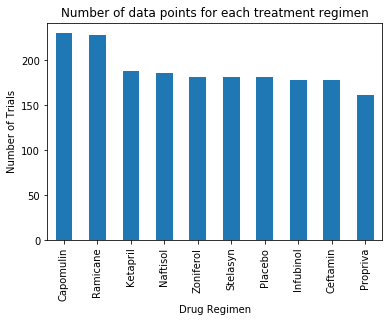

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_point = df['Drug Regimen'].value_counts()
data_point.plot(kind = 'bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Trials')
plt.title('Number of data points for each treatment regimen')
plt.show()

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

data_point

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

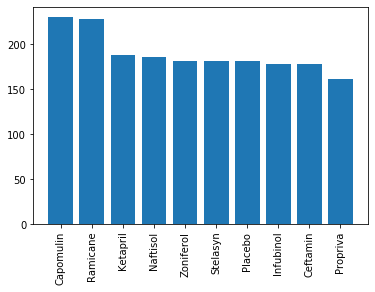

In [5]:
plt.bar(data_point.index.values, data_point.values)

plt.xticks(rotation = 'vertical') 

## Pie plots

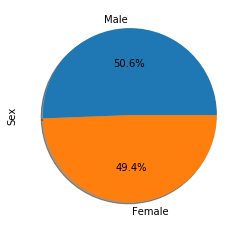

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex = df['Sex'].value_counts()
sex.plot(kind = 'pie', autopct = '%1.1f%%', shadow = True)
plt.show()

Text(0.5, 1.0, 'Sex Ratio')

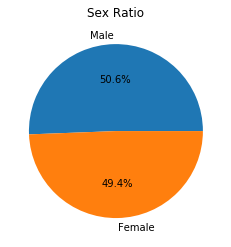

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex, autopct = '%1.1f%%', labels = sex.index)
plt.title("Sex Ratio")

## Quartiles, outliers and boxplots

In [8]:
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
timepoint = df.groupby('Mouse ID').max()['Timepoint']
timepoint = timepoint.reset_index()
timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [10]:
tumor_vol = pd.merge(df, timepoint, on = ["Timepoint", "Mouse ID"], how = 'right')
tumor_vol_1 = tumor_vol[['Drug Regimen', 'Tumor Volume (mm3)']]
tumor_vol_1

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,22.050126
1,Capomulin,23.343598
2,Capomulin,28.484033
3,Capomulin,28.430964
4,Ramicane,29.128472
...,...,...
244,Stelasyn,45.934712
245,Propriva,48.710661
246,Infubinol,62.754451
247,Naftisol,65.741070


In [11]:
ramicane = tumor_vol_1[tumor_vol_1['Drug Regimen'] == 'Ramicane']
capomulin = tumor_vol_1[tumor_vol_1['Drug Regimen'] == 'Capomulin']
propriva = tumor_vol_1[tumor_vol_1['Drug Regimen'] == 'Propriva']
ceftamin = tumor_vol_1[tumor_vol_1['Drug Regimen'] == 'Ceftamin']

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
summary['Mean'].sort_values()

Drug Regimen
Ramicane     40.216745
Capomulin    40.675741
Propriva     52.322552
Ceftamin     52.591172
Infubinol    52.884795
Zoniferol    53.236507
Placebo      54.033581
Stelasyn     54.233149
Naftisol     54.331565
Ketapril     55.235638
Name: Mean, dtype: float64

In [13]:
IQR_ramicane = ramicane.quantile(.75) - ramicane.quantile(.25)
IQR_ramicane
lower_Q = ramicane.quantile(.25) - (IQR_ramicane * 1.5)
upper_Q = ramicane.quantile(.75) + (IQR_ramicane * 1.5)

ramicane[(ramicane['Tumor Volume (mm3)'] > upper_Q[0]) | (ramicane['Tumor Volume (mm3)'] < lower_Q[0])]


,Drug Regimen,Tumor Volume (mm3)


In [14]:
IQR_capomulin = capomulin.quantile(.75) - capomulin.quantile(.25)
IQR_capomulin
lower_Q = capomulin.quantile(.25) - (IQR_capomulin * 1.5)
upper_Q = capomulin.quantile(.75) + (IQR_capomulin * 1.5)

capomulin[(capomulin['Tumor Volume (mm3)'] > upper_Q[0]) | (capomulin['Tumor Volume (mm3)'] < lower_Q[0])]


,Drug Regimen,Tumor Volume (mm3)


In [15]:
IQR_propriva = propriva.quantile(.75) - propriva.quantile(.25)
IQR_propriva
lower_Q = propriva.quantile(.25) - (IQR_propriva * 1.5)
upper_Q = propriva.quantile(.75) + (IQR_propriva * 1.5)

propriva[(propriva['Tumor Volume (mm3)'] > upper_Q[0]) | (propriva['Tumor Volume (mm3)'] < lower_Q[0])]

,Drug Regimen,Tumor Volume (mm3)


In [16]:
IQR_ceftamin = ceftamin.quantile(.75) - ceftamin.quantile(.25)
IQR_ceftamin
lower_Q = ceftamin.quantile(.25) - (IQR_ceftamin * 1.5)
upper_Q = ceftamin.quantile(.75) + (IQR_ceftamin * 1.5)

ceftamin[(ceftamin['Tumor Volume (mm3)'] > upper_Q[0]) | (ceftamin['Tumor Volume (mm3)'] < lower_Q[0])]

,Drug Regimen,Tumor Volume (mm3)


In [17]:
ramicane = ramicane['Tumor Volume (mm3)']
capomulin = capomulin['Tumor Volume (mm3)']
propriva = propriva['Tumor Volume (mm3)']
ceftamin = ceftamin['Tumor Volume (mm3)']

Text(0, 0.5, 'Final Tumor Volume (mm3)')

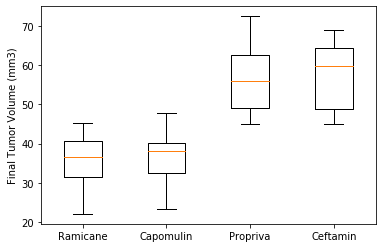

In [26]:
plt.boxplot([ramicane, capomulin, propriva, ceftamin], labels=['Ramicane', 'Capomulin', 'Propriva','Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')


In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [34]:
ramicane_table = df[df['Drug Regimen'] == 'Ramicane']
capomulin_table = df[df['Drug Regimen'] == 'Capomulin']
propriva_table = df[df['Drug Regimen'] == 'Propriva']
ceftamin_table = df[df['Drug Regimen'] == 'Ceftamin']

capomulin_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


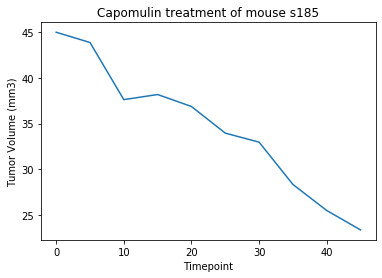

In [42]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_s185 = capomulin_table[capomulin_table['Mouse ID'] == 's185']
plt.plot(capomulin_s185['Timepoint'], capomulin_s185['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse s185')
plt.show()

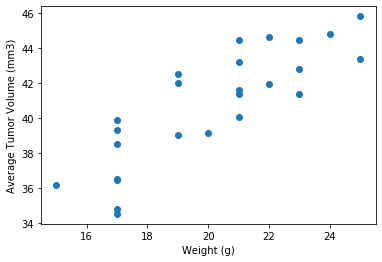

In [48]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_avg = capomulin_table.groupby(['Mouse ID']).mean()
mouse_avg

plt.scatter(mouse_avg['Weight (g)'], mouse_avg['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show() 

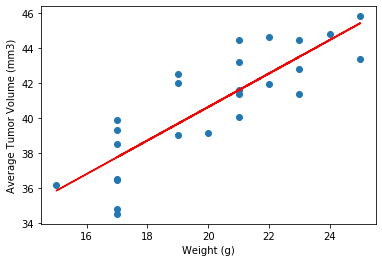

In [51]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
model = st.linregress(mouse_avg['Weight (g)'],mouse_avg['Tumor Volume (mm3)'])
y_values = mouse_avg['Weight (g)']*model[0]+model[1]
plt.scatter(mouse_avg['Weight (g)'],mouse_avg['Tumor Volume (mm3)'])
plt.plot(mouse_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()